## Passo 1
- Análise descritiva.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder #, StandardScaler
from Utils import scartterplot, boxplots_comparacao, boxplots, countplots_comparacao, countplots, histplots_comparacao

nível de satisfação do colaborador com a empresa, média de horas mensais trabalhadas, tempo de empresa, acidente de trabalho, departamento, salário ...

In [2]:
df = pd.read_csv('Data/HR_Abandono.csv', sep=';')
df.head()

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,1,"0,38","0,53",157,3,0,1,0,low,2,sales
1,2,"0,8","0,86",262,6,0,1,0,medium,5,sales
2,3,"0,11","0,88",272,4,0,1,0,medium,6,sales
3,4,"0,72","0,87",223,5,0,1,0,low,5,sales
4,5,"0,37","0,52",159,3,0,1,0,low,2,sales


In [3]:
df.shape

(14999, 11)

<Axes: >

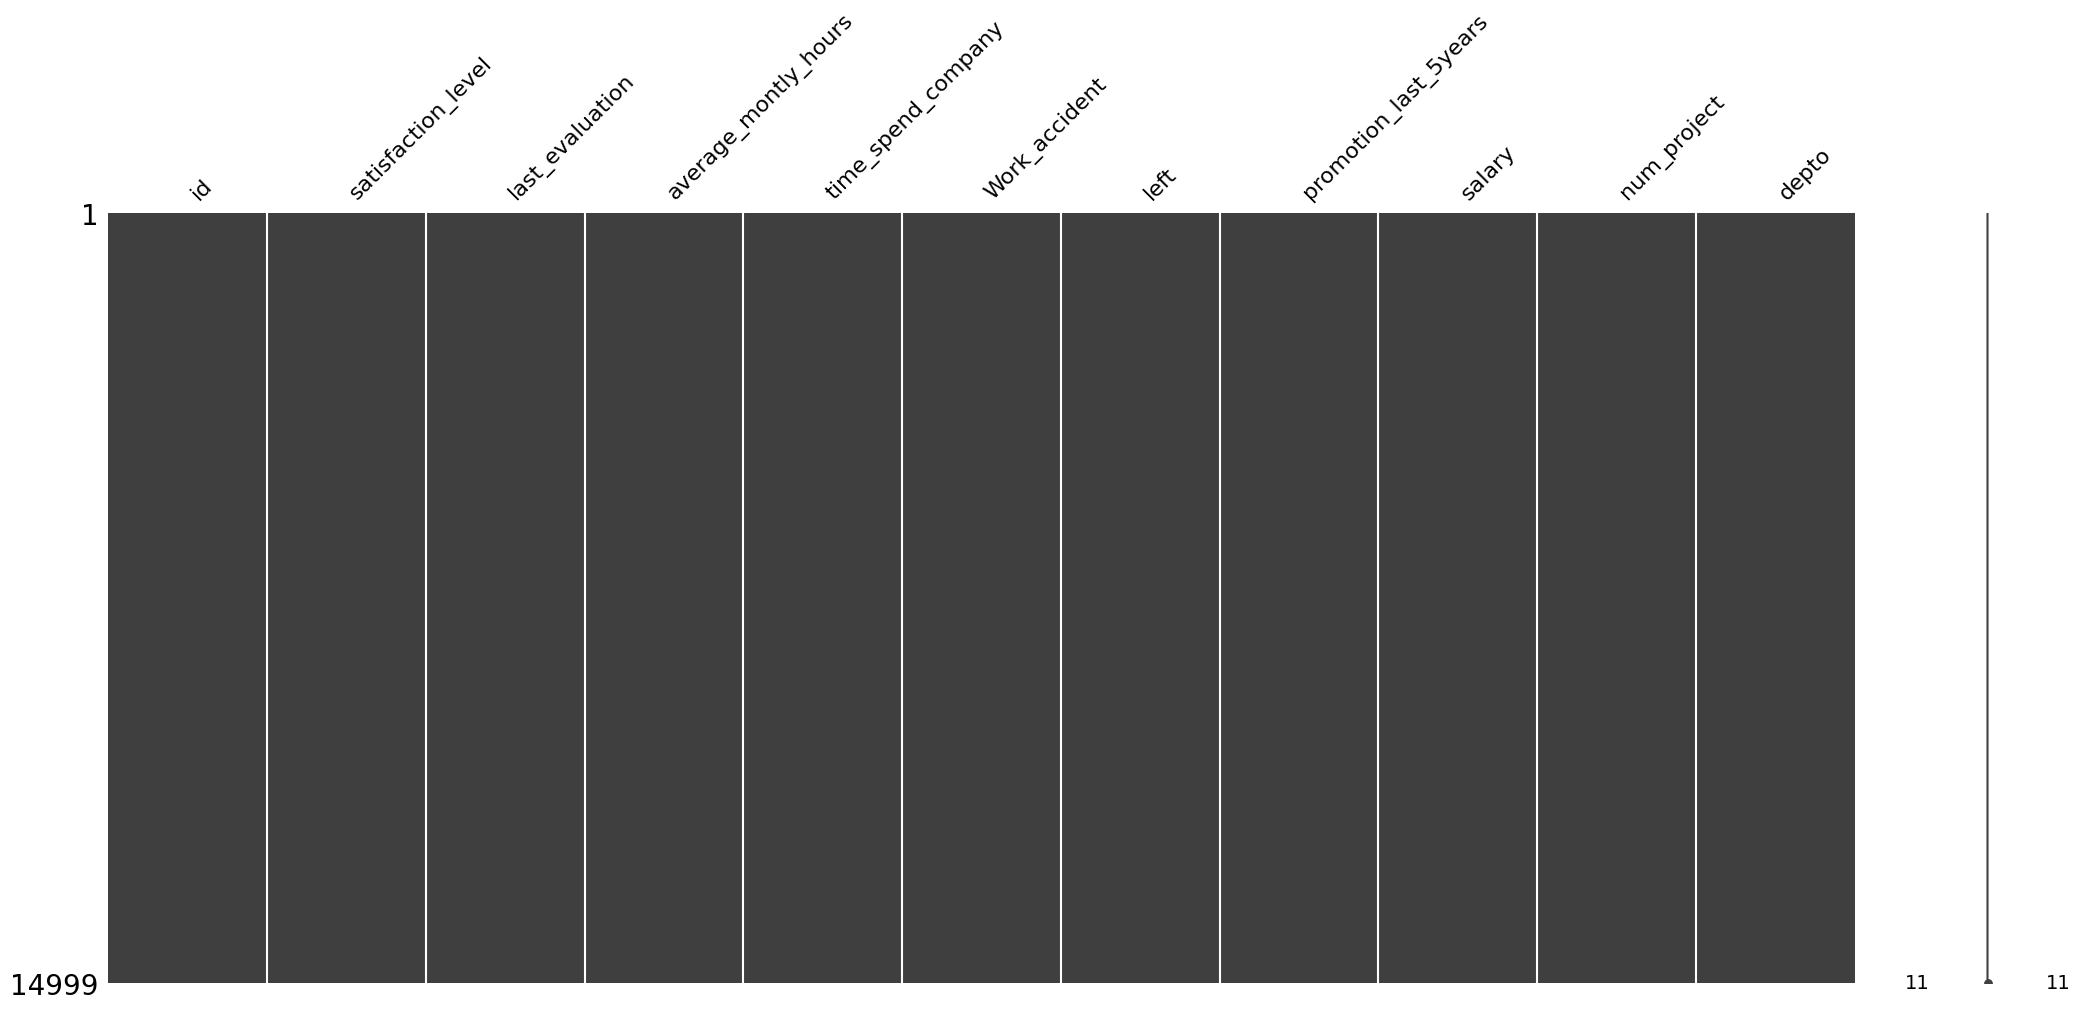

In [4]:
msno.matrix(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     14999 non-null  int64 
 1   satisfaction_level     14999 non-null  object
 2   last_evaluation        14999 non-null  object
 3   average_montly_hours   14999 non-null  int64 
 4   time_spend_company     14999 non-null  int64 
 5   Work_accident          14999 non-null  int64 
 6   left                   14999 non-null  int64 
 7   promotion_last_5years  14999 non-null  int64 
 8   salary                 14999 non-null  object
 9   num_project            14999 non-null  int64 
 10  depto                  14999 non-null  object
dtypes: int64(7), object(4)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()

id                       0
satisfaction_level       0
last_evaluation          0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
salary                   0
num_project              0
depto                    0
dtype: int64

In [7]:
df.duplicated().sum()

0

Sem registros nulos e duplicados

In [8]:
df['satisfaction_level'] = df['satisfaction_level'].str.replace(',', '.').astype(float)
df['last_evaluation'] = df['last_evaluation'].str.replace(',', '.').astype(float)
df.drop('id', axis=1, inplace=True)

- Remover coluna id
- Trocar , por .
- Converter dados de satisfaction_level e last_evaluation do tipo object para float64

In [9]:
print(set(df['salary']))
print(set(df['depto']))

{'medium', 'high', 'low'}
{'hr', 'RandD', 'IT', 'marketing', 'accounting', 'management', 'support', 'product_mng', 'sales', 'technical'}


In [10]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [11]:
df['depto'].value_counts()

depto
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [12]:
df[['salary', 'depto']].describe().round(2)

,salary,depto
count,14999,14999
unique,3,10
top,low,sales
freq,7316,4140


In [13]:
df['Work_accident'].value_counts()

Work_accident
0    12830
1     2169
Name: count, dtype: int64

In [14]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [15]:
df['promotion_last_5years'].value_counts()

promotion_last_5years
0    14680
1      319
Name: count, dtype: int64

Como a contagem de valores distintos(unique), a moda(top) e a frequência da mesma(freq)

In [16]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.61,0.25,0.01,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.72,0.17,0.36,0.56,0.72,0.87,1.0
average_montly_hours,14999.0,201.08,50.18,96.00,156.00,200.00,245.00,810.0
time_spend_company,14999.0,3.41,1.18,2.00,3.00,3.00,4.00,6.0
Work_accident,14999.0,0.14,0.35,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.24,0.43,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.02,0.14,0.00,0.00,0.00,0.00,1.0
num_project,14999.0,3.79,1.19,2.00,3.00,4.00,5.00,6.0


Contagem de linhas (count), o cálculo da média (mean) e desvio padrão (std) e identifica o valor mínimo (min), os quartis (25%, 50% e 75%) e o valor máximo (max).

#### Variáveis
---
- Variáveis Quantitativas Contínuas: Nível de satisfação, ultima avaliação.
---
- Variáveis Quantitativas Discretas: Média de horas trabalhadas, tempo de empresa, número de projetos.
---
- Variáveis Qualitativas Binarias: Acidentes de trabalho, saiu da empresa, promoção nos últimos 5 anos.
---
- Variável Qualitativa Nominal: Nível de salário, departamento

## Passo 2
- Análise exploratória.

> Perguntas
- O que interfere no abandono da empresa?
  - Nível de satisfação com a empresa, última avaliação
  - Tempo de empresa com promoção nos últimos 5 anos
  - Média de horas trabalhadas e número de projetos
  - Acidentes de trabalho
  - Departamento
  - Nível de salário

In [17]:
sns.set_style('whitegrid')

In [18]:
total = len(df)
total_non_left = df[df['left'] == 0].left.count()
total_left = df[df['left'] == 1].left.count()

percentual_Left = total_left / total 

print("Total de dados: ", total)
print("Total de não abandonos da empresa: ", total_non_left)
print("Total de abandonos da empresa: ", total_left)
print("Percentual de abandonos na base: ", (round(percentual_Left, 2)*100), "%")

Total de dados:  14999
Total de não abandonos da empresa:  11428
Total de abandonos da empresa:  3571
Percentual de abandonos na base:  24.0 %


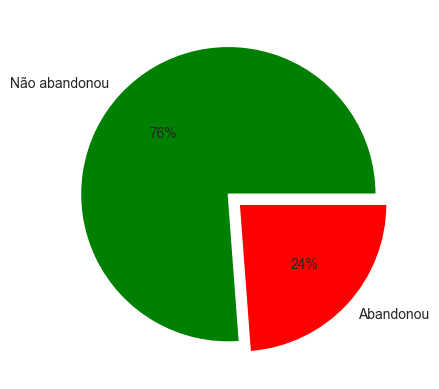

In [19]:
plt.pie(df['left'].value_counts(), labels=['Não abandonou', 'Abandonou'], autopct='%.0f%%', explode=(0, 0.1), colors=('g', 'r'))
plt.show()

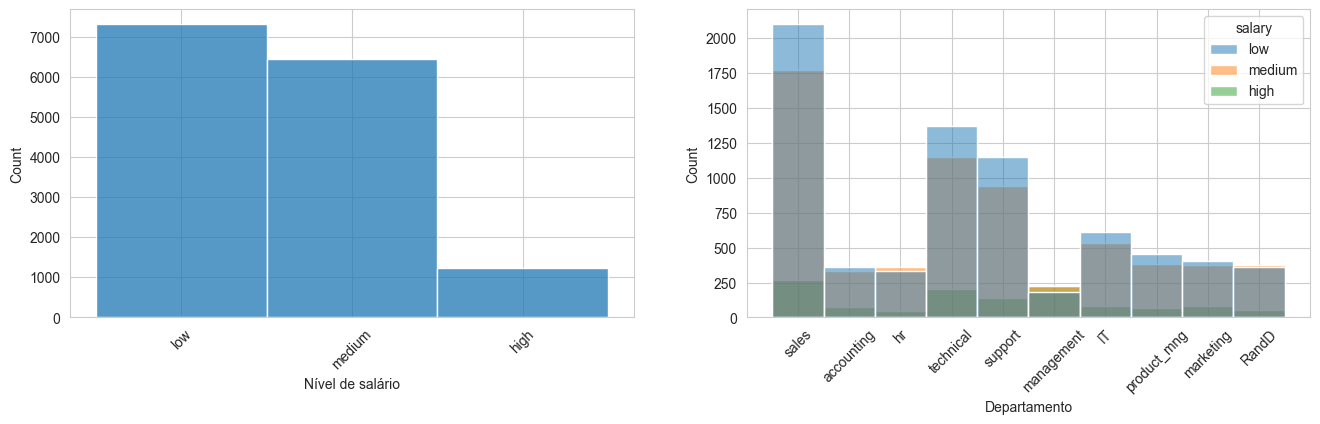

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.histplot(data=df, x='salary', ax=ax[0])
ax[0].set_xlabel('Nível de salário')
ax[0].tick_params(axis='x', rotation=45)
sns.histplot(data=df, x='depto', ax=ax[1], hue='salary')
ax[1].set_xlabel('Departamento')
ax[1].tick_params(axis='x', rotation=45)
plt.show()

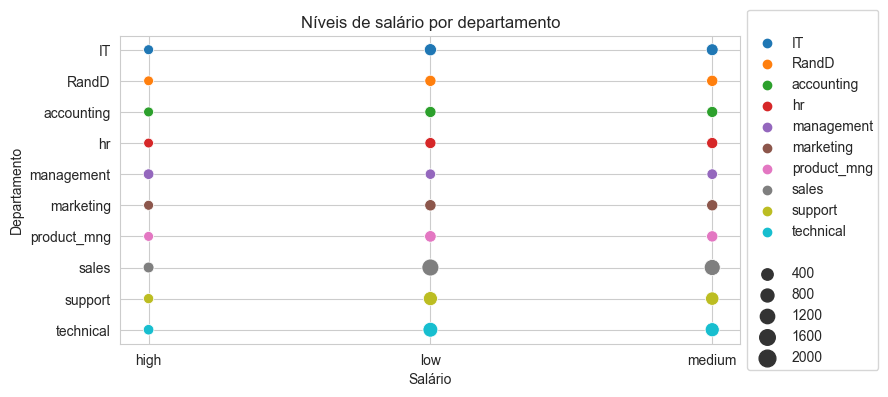

In [21]:
depto_counts = df.groupby(['salary', 'depto']).size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(data=depto_counts, x='salary', y='depto', size='count', ax=ax, hue='depto', sizes=(50, 150))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.texts[0].set_text('') #type: ignore
legend.texts[11].set_text('') #type: ignore
plt.title('Níveis de salário por departamento')
plt.xlabel('Salário')
plt.ylabel('Departamento')
plt.show()

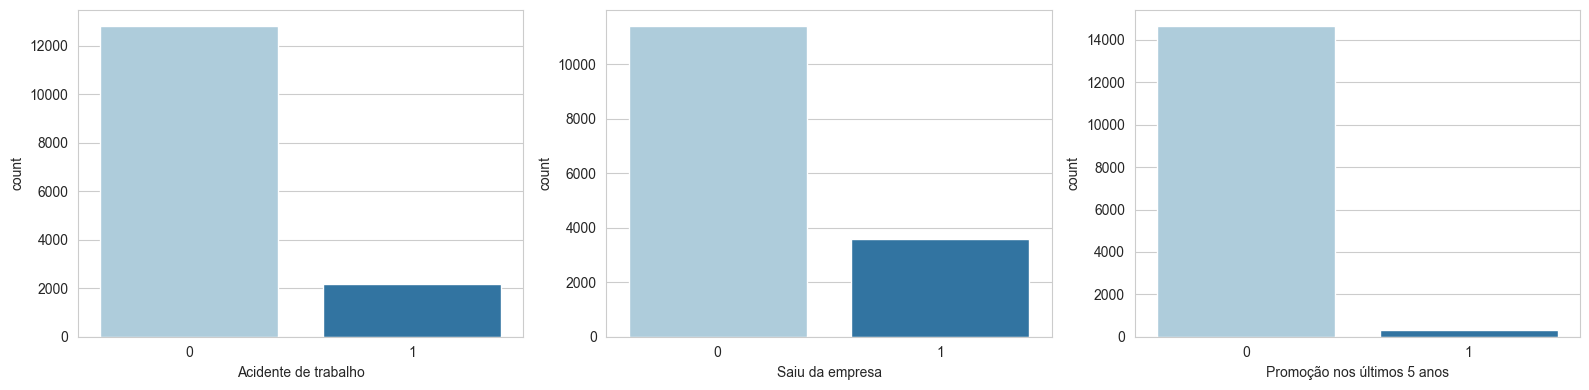

In [22]:
countplots(df)

In [23]:
boxplots(df)

In [24]:
scartterplot(df)

Verificar outliers

In [25]:
Q1 = df['average_montly_hours'].quantile(.25)
Q3 = df['average_montly_hours'].quantile(.75)
IQR = Q3 - Q1
LI = Q1 - 1.5 * IQR
LS = Q3 + 1.5 * IQR
print(Q1)
print(Q3)
print(IQR)
print(LI)
print(LS)

156.0
245.0
89.0
22.5
378.5


In [26]:
outliers = (df['average_montly_hours'] < LI) | (df['average_montly_hours'] > LS)
df[outliers]

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
14972,0.11,0.97,810,4,0,1,0,medium,6,accounting


Outlier não removido por registro conter maior quantidade de projetos envolvidos e por isso saiu da empresa.

Conversao das variáveis qualitativas para ser usada no modelo

In [27]:
df_non_left = df[df['left'] == 0]
df_left = df[df['left'] == 1]

In [28]:
df_left.head()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,0.38,0.53,157,3,0,1,0,low,2,sales
1,0.80,0.86,262,6,0,1,0,medium,5,sales
2,0.11,0.88,272,4,0,1,0,medium,6,sales
3,0.72,0.87,223,5,0,1,0,low,5,sales
4,0.37,0.52,159,3,0,1,0,low,2,sales


In [29]:
df_non_left.head()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
2000,0.58,0.74,215,3,0,0,0,low,4,sales
2001,0.82,0.67,202,3,0,0,0,low,2,sales
2002,0.45,0.69,193,3,0,0,0,low,5,sales
2003,0.78,0.82,247,3,0,0,0,low,5,sales
2004,0.49,0.60,214,2,0,0,0,low,3,sales


In [30]:
df_left.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,3571.0,0.44,0.26,0.01,0.13,0.41,0.73,0.92
last_evaluation,3571.0,0.72,0.20,0.45,0.52,0.79,0.90,1.00
average_montly_hours,3571.0,207.56,62.00,126.00,146.00,224.00,262.00,810.00
time_spend_company,3571.0,3.88,0.98,2.00,3.00,4.00,5.00,6.00
Work_accident,3571.0,0.05,0.21,0.00,0.00,0.00,0.00,1.00
left,3571.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00
promotion_last_5years,3571.0,0.01,0.07,0.00,0.00,0.00,0.00,1.00
num_project,3571.0,3.78,1.71,2.00,2.00,4.00,6.00,6.00


In [31]:
df_non_left.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11428.0,0.67,0.22,0.12,0.54,0.69,0.84,1.0
last_evaluation,11428.0,0.72,0.16,0.36,0.58,0.71,0.85,1.0
average_montly_hours,11428.0,199.06,45.68,96.00,162.00,198.00,238.00,287.0
time_spend_company,11428.0,3.26,1.19,2.00,2.00,3.00,4.00,6.0
Work_accident,11428.0,0.18,0.38,0.00,0.00,0.00,0.00,1.0
left,11428.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0
promotion_last_5years,11428.0,0.03,0.16,0.00,0.00,0.00,0.00,1.0
num_project,11428.0,3.79,0.98,2.00,3.00,4.00,4.00,6.0


In [32]:
boxplots_comparacao(df_left, df_non_left)

In [33]:
df_left_log = df_left
df_non_left_log = df_non_left
for column in [0, 1, 2, 3, 8]:
    df_left_log.iloc[:, column] = np.log10(df_left_log.iloc[:, column])

for column in [0, 1, 2, 3, 8]:
    df_non_left_log.iloc[:, column] = np.log10(df_non_left_log.iloc[:, column])

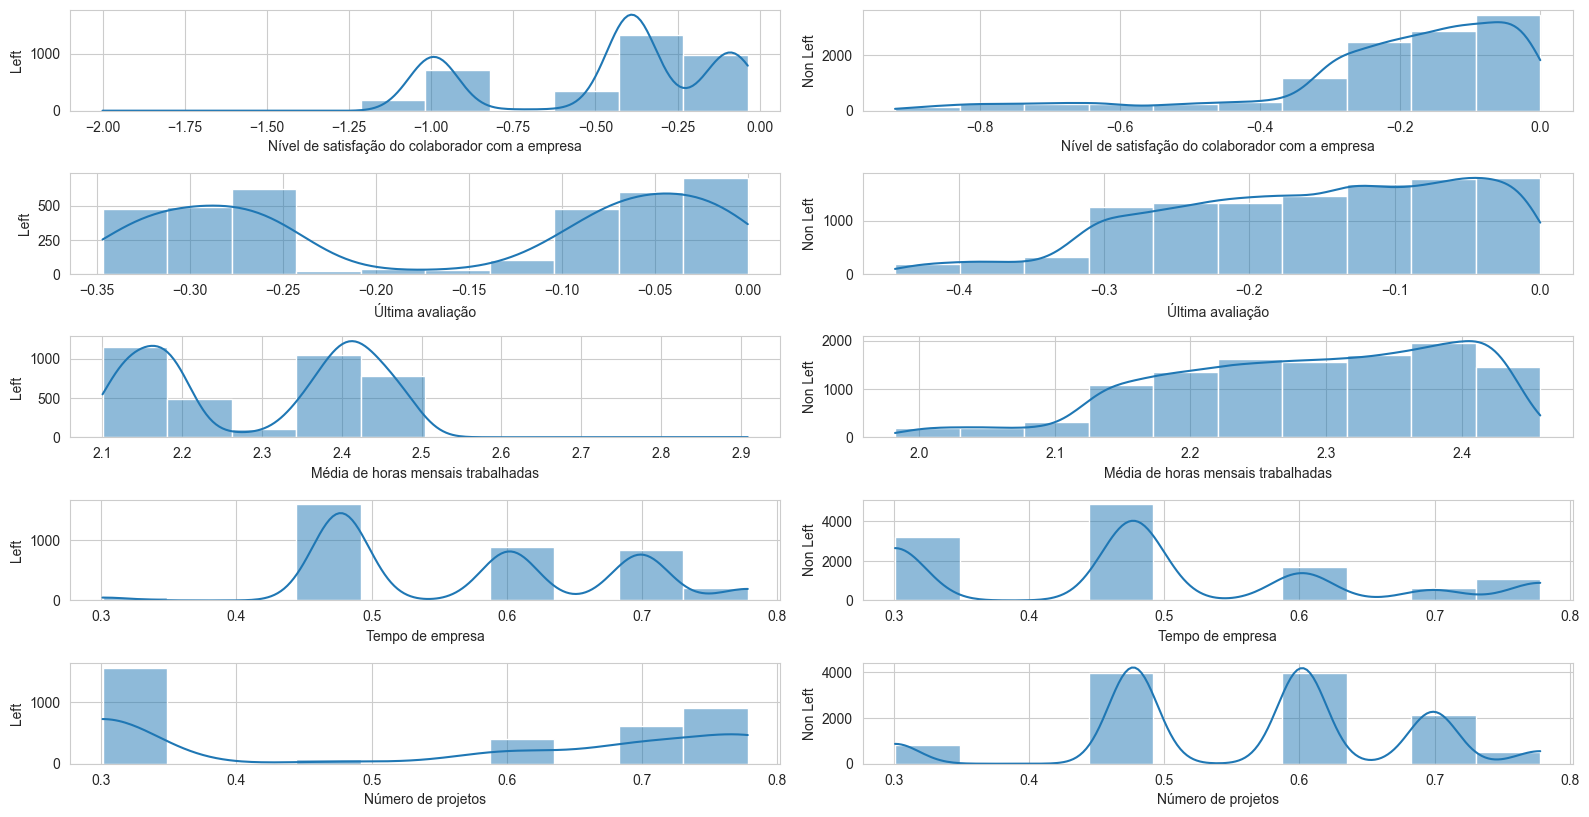

In [34]:
histplots_comparacao(df_left_log, df_non_left_log)

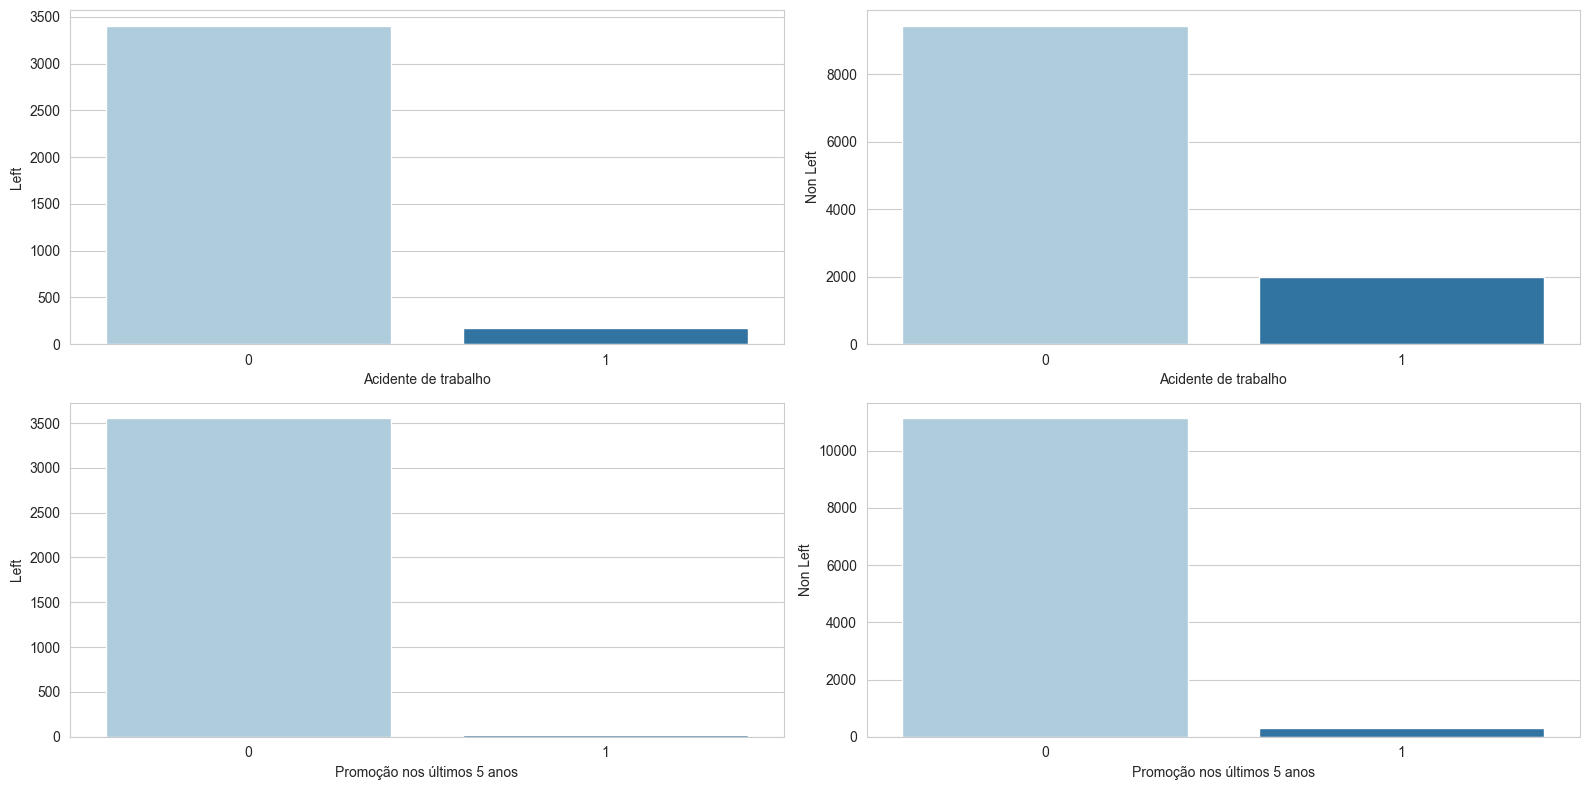

In [35]:
countplots_comparacao(df_left, df_non_left)

In [36]:
total_left = len(df_left)
total_p_5y = df_left[df_left['promotion_last_5years'] == 1].promotion_last_5years.count()
total_wa = df_left[df_left['Work_accident'] == 1].Work_accident.count()
percentual_promotion = total_p_5y / total_left
percentual_work_accident = total_wa / total_left

total_nleft = len(df_non_left)
total_np_5y = df_non_left[df_non_left['promotion_last_5years'] == 1].promotion_last_5years.count()
total_nwa = df_non_left[df_non_left['Work_accident'] == 1].Work_accident.count()
percentual_npromotion = total_np_5y / total_nleft
percentual_nwork_accident = total_nwa / total_nleft

print("Percentual acidentes de trabalho em não abandonos na base: ", (round(percentual_nwork_accident, 2)*100), "%")
print("Percentual acidentes de trabalho em abandonos na base: ", (round(percentual_work_accident, 2)*100), "%")
print("Percentual promoção em não abandonos na base: ", (round(percentual_npromotion, 2)*100), "%")
print("Percentual promoção em abandonos na base: ", (round(percentual_promotion, 2)*100), "%")

Percentual acidentes de trabalho em não abandonos na base:  18.0 %
Percentual acidentes de trabalho em abandonos na base:  5.0 %
Percentual promoção em não abandonos na base:  3.0 %
Percentual promoção em abandonos na base:  1.0 %


> Respostas
---
- A satisfação dos colaboradores que abandonaram a empresa é em media e mediana menor.
- A última avaliação dos colaboradores que abandonaram a empresa tem uma mediana maior.
- Colaboradores que abandonaram a empresa trabalhavam em média mais horas mensais.
- Colaboradores que abandonaram a empresa tinham um tempo maior de empresa.
- Colaboradores que abandonaram a empresa tiveram um menor número de promoções nos últimos 5 anos.
---
- Nota-se que colaborados bem avaliados, com maior tempo de empresa, trabalham mais horas mensais e com um número menor promoções tendem a ficar mais insatisfeitos e abandonarem a empresa.

## Passo 3
- Hipóteses estatísticas.

> Hipotes
---
- A satisfação dos colaboradores interfere no abandono da empresa.
- Avaliação de colaboradores, maior tempo de empresa, maior média de horas trabalhadas mensais e um número menor promoções interferem no abandono da empresa.

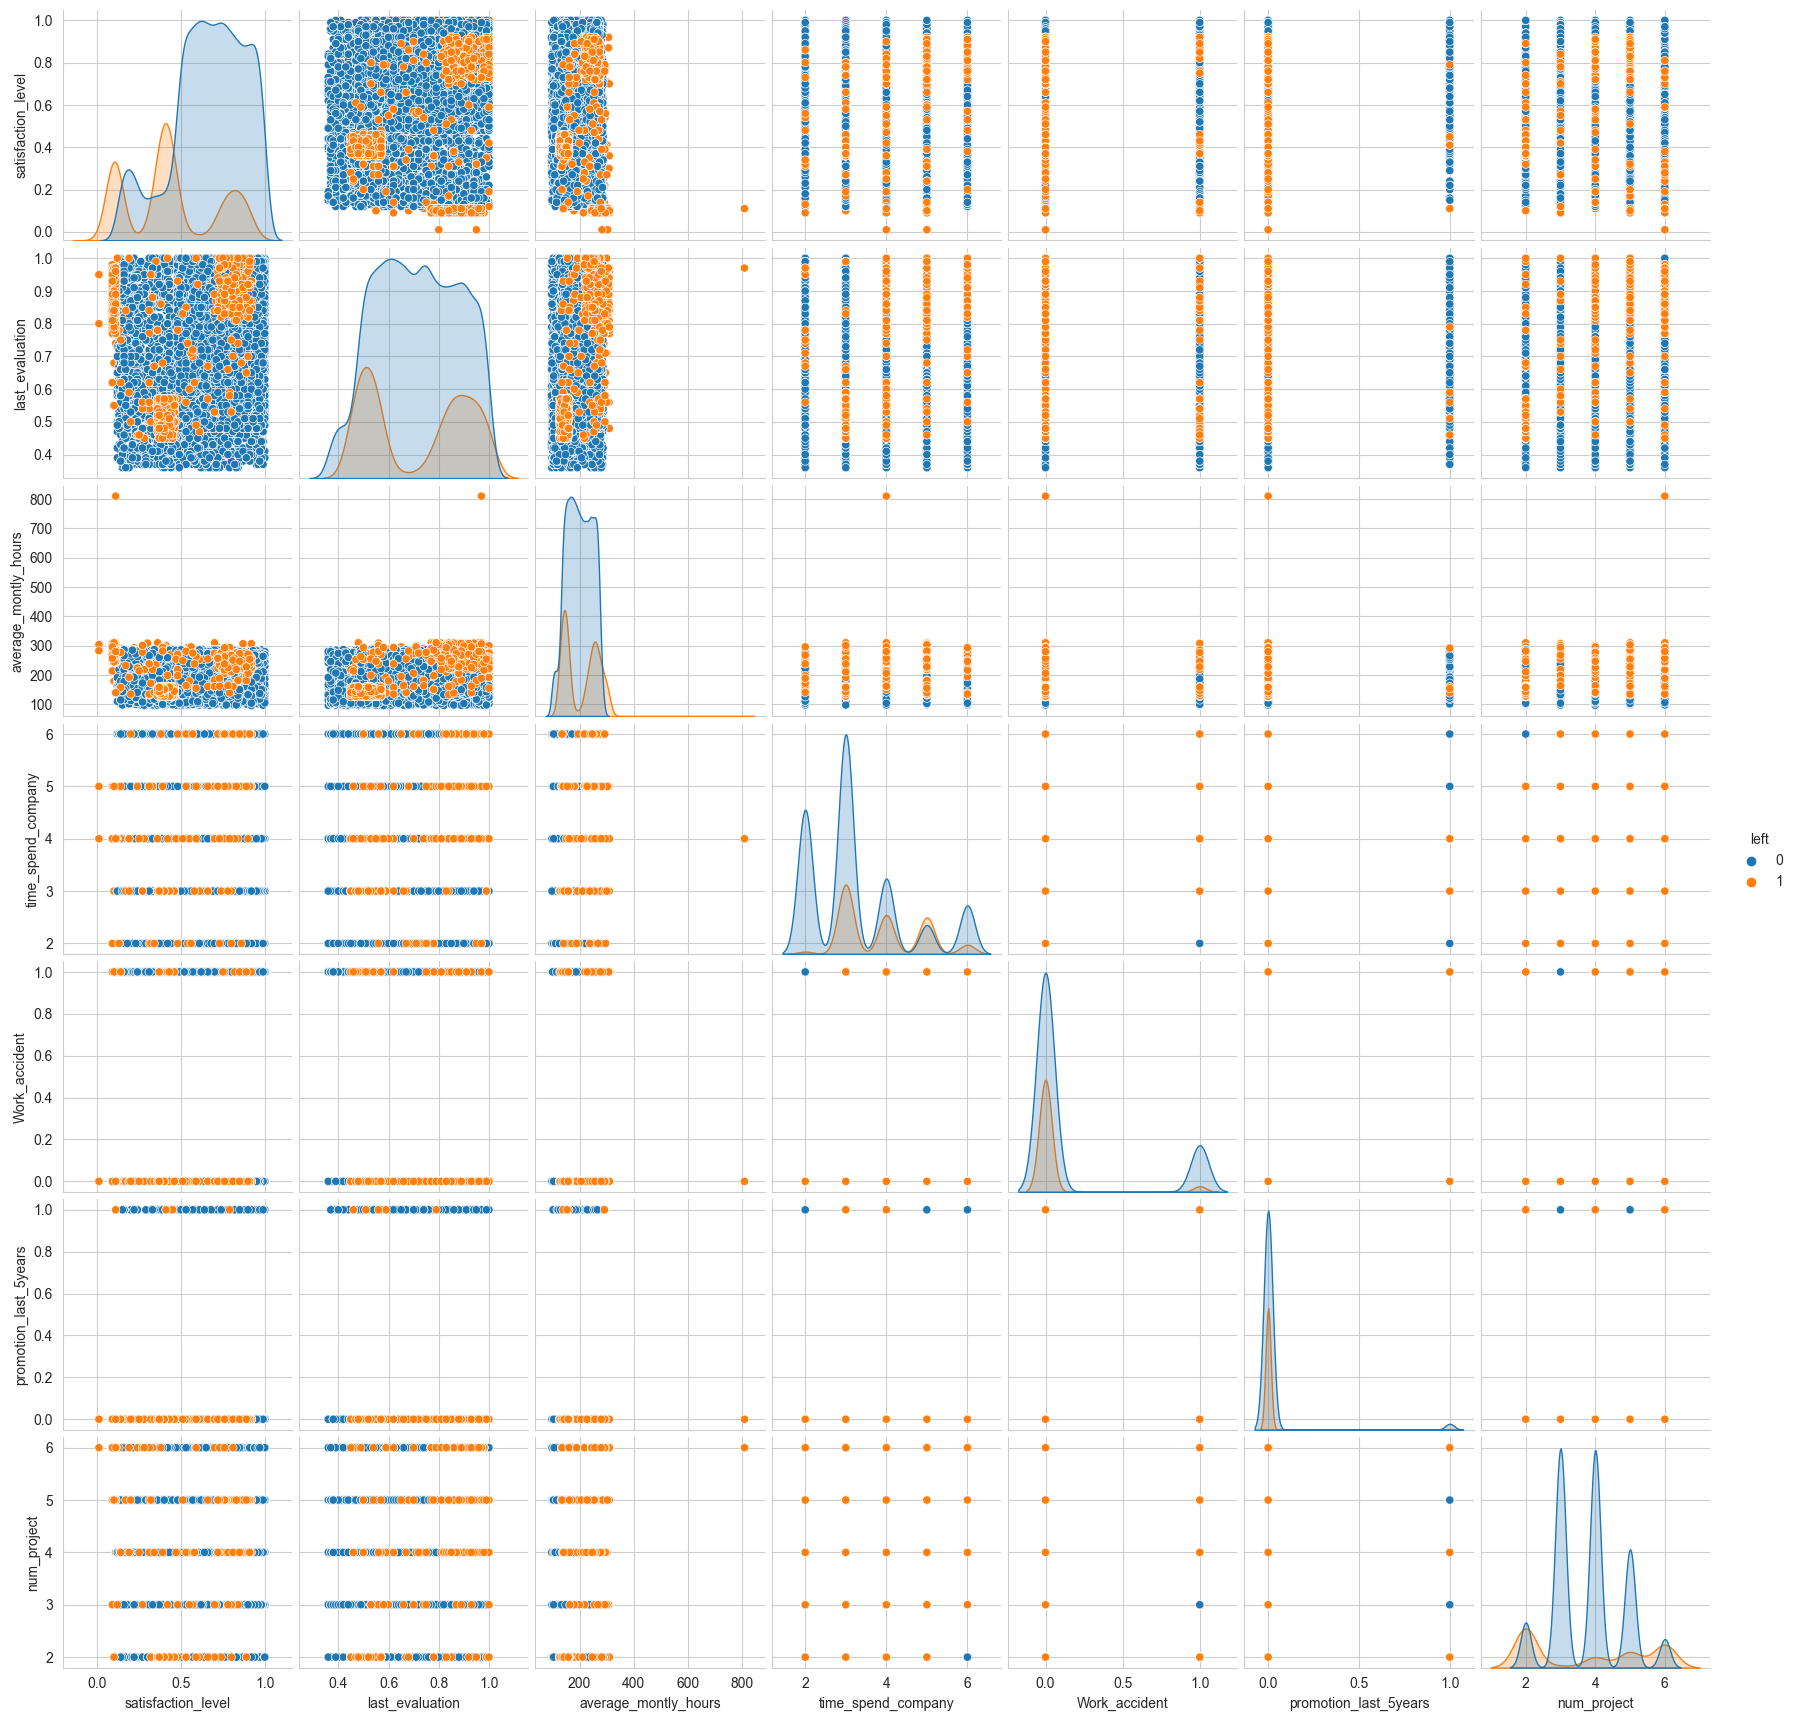

In [37]:
sns.pairplot(df, hue='left')
plt.show()

> Resultado da hipóteses
---
- Modelos de carro interferem no preço
- Idade influencia no preço
- A quilometragem interfere no preço
- Potencia interfere no preço
- Números de dono interfere no preço
- Número de ordens de serviço interfere no valor
- Espaço para as pernas interfere no valor
---
- Pode-se comprovar estatisticamente que a quilometragem do veiculo é a única informação que nao afeta o seu valor.

## Passo 4

Análise de correlação. 

## Passo 5

Construa um modelo preditivo com a lib scikit-learn. Explicar qual algoritmo e hiperparâmetros utilizado.

In [38]:
label_encoder = LabelEncoder()

df['salary_encoded'] = label_encoder.fit_transform(df['salary'])
df['depto_encoded'] = label_encoder.fit_transform(df['depto'])

In [39]:
df.head()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto,salary_encoded,depto_encoded
0,0.38,0.53,157,3,0,1,0,low,2,sales,1,7
1,0.80,0.86,262,6,0,1,0,medium,5,sales,2,7
2,0.11,0.88,272,4,0,1,0,medium,6,sales,2,7
3,0.72,0.87,223,5,0,1,0,low,5,sales,1,7
4,0.37,0.52,159,3,0,1,0,low,2,sales,1,7


In [40]:
# scaler = MinMaxScaler() 
# scaler.fit(x_train)

## Passo 6

Valide o modelo com métricas estatísticas para comprovar a eficacia do modelo.